In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [154]:
df = pd.read_csv('../datasets/nyc_taxi.csv')

In [155]:
def nytAnomalyPlot(dfr):
    #Primero dibujo la serie completa
    plt.figure(figsize=(30, 6))
    plt.plot(dfr['timestamp'] , dfr['value'])
    #Ahora marco sectores anormales
    in_region = False
    for i in dfr.index:
        if dfr.loc[i, ['is_anomaly']].values[0] == 1 and not in_region:
            # Comienza una región de tipo 'A'
            start_x = dfr.loc[i, ['timestamp']].values[0]
            in_region = True
        elif dfr.loc[i, ['is_anomaly']].values[0] == 0 and in_region:
            # Termina una región de tipo 'A'
            end_x = dfr.loc[i, ['timestamp']].values[0]
            plt.axvspan(start_x, end_x, color='red', alpha=0.3)
            in_region = False

    plt.xlabel('Timestamp')
    plt.xticks(rotation=45)
    plt.ylabel('Taxi Demand')
    plt.title('NYC Taxi Demand')
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=30))
    plt.show()

In [156]:
df.shape

(10320, 2)

In [157]:
df.dtypes

timestamp    object
value         int64
dtype: object

In [158]:
# tengo 48 datos por dia
day = 24*60*60
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["timestamp_s"] = pd.to_datetime(df['timestamp']).map(datetime.timestamp)
df["timestamp_s"] = df["timestamp_s"]-df["timestamp_s"].iloc[0]
df['day_sin'] = (np.sin(df["timestamp_s"] * (2*np.pi/day))).values
df['day_cos'] = (np.cos(df["timestamp_s"] * (2*np.pi/day))).values

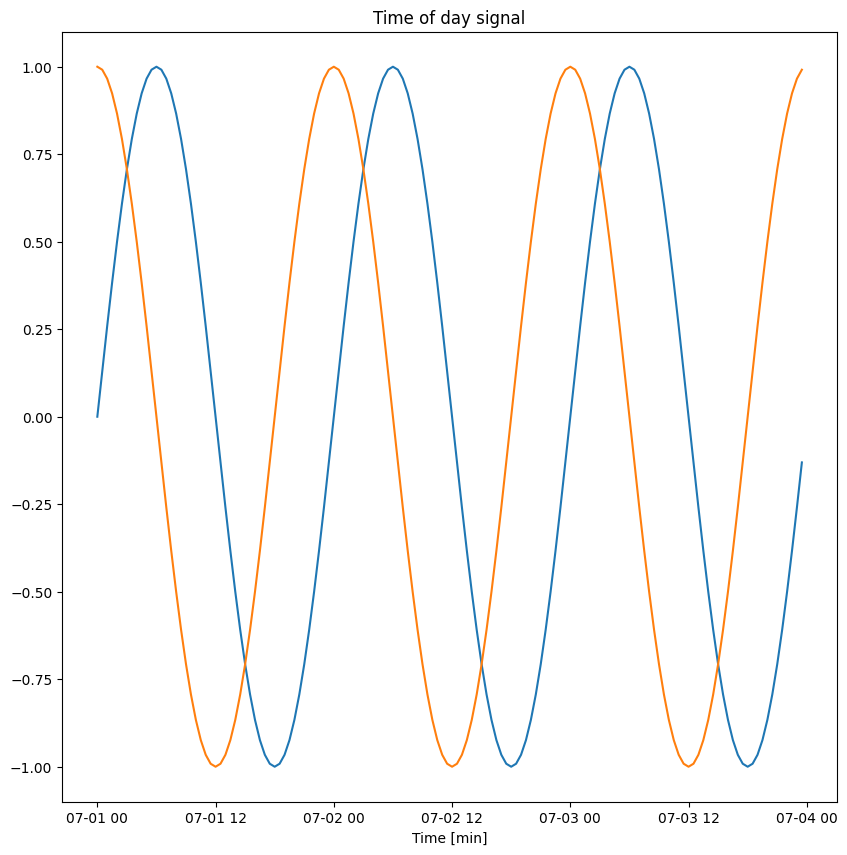

In [159]:
limit_max = 48*3
plt.figure(figsize=(10, 10))
plt.plot(df["timestamp"][:limit_max], df['day_sin'][:limit_max])
plt.plot(df["timestamp"][:limit_max], df['day_cos'][:limit_max])
plt.xlabel('Time [min]')
plt.title('Time of day signal')
plt.show()


In [160]:
df.head()

,timestamp,value,timestamp_s,day_sin,day_cos
0,2014-07-01 00:00:00,10844,0.0,0.000000,1.000000
1,2014-07-01 00:30:00,8127,1800.0,0.130526,0.991445
2,2014-07-01 01:00:00,6210,3600.0,0.258819,0.965926
3,2014-07-01 01:30:00,4656,5400.0,0.382683,0.923880
4,2014-07-01 02:00:00,3820,7200.0,0.500000,0.866025


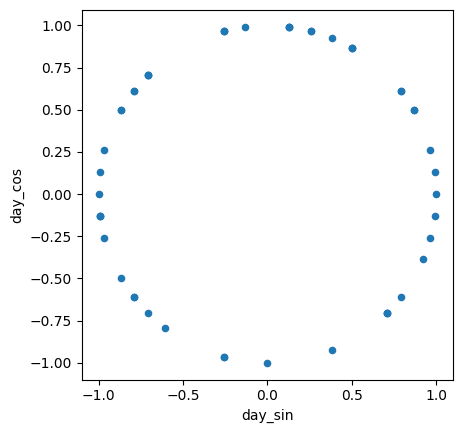

In [161]:
df.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal')


In [162]:
n = len(df)
# Split 70:20:10 (train:validation:test)
df_train    = df.iloc[0:int(n*0.7),:].copy() 
df_val      = df.iloc[int(n*0.7):int(n*0.9),:].copy() 
df_test     = df.iloc[int(n*0.9):,:].copy()  
columns     = ["value"]
scaler = MinMaxScaler()
scaler.fit(df_train[columns]) 
df_train.loc[:,columns] = scaler.transform(df_train[columns])
df_val.loc[:,columns]   = scaler.transform(df_val[columns])
df_test.loc[:,columns]  = scaler.transform(df_test[columns])
del df

In [171]:
import sys
sys.path.insert(0, '../Code')
from DataWindow.DataWindow import DataWindow

2025-02-20 17:46:34.542076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 17:46:34.550956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 17:46:34.569656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740084394.605134   14511 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740084394.615231   14511 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 17:46:34.646715: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

NameError: name 'train_df' is not defined

La serie es la siguiente:

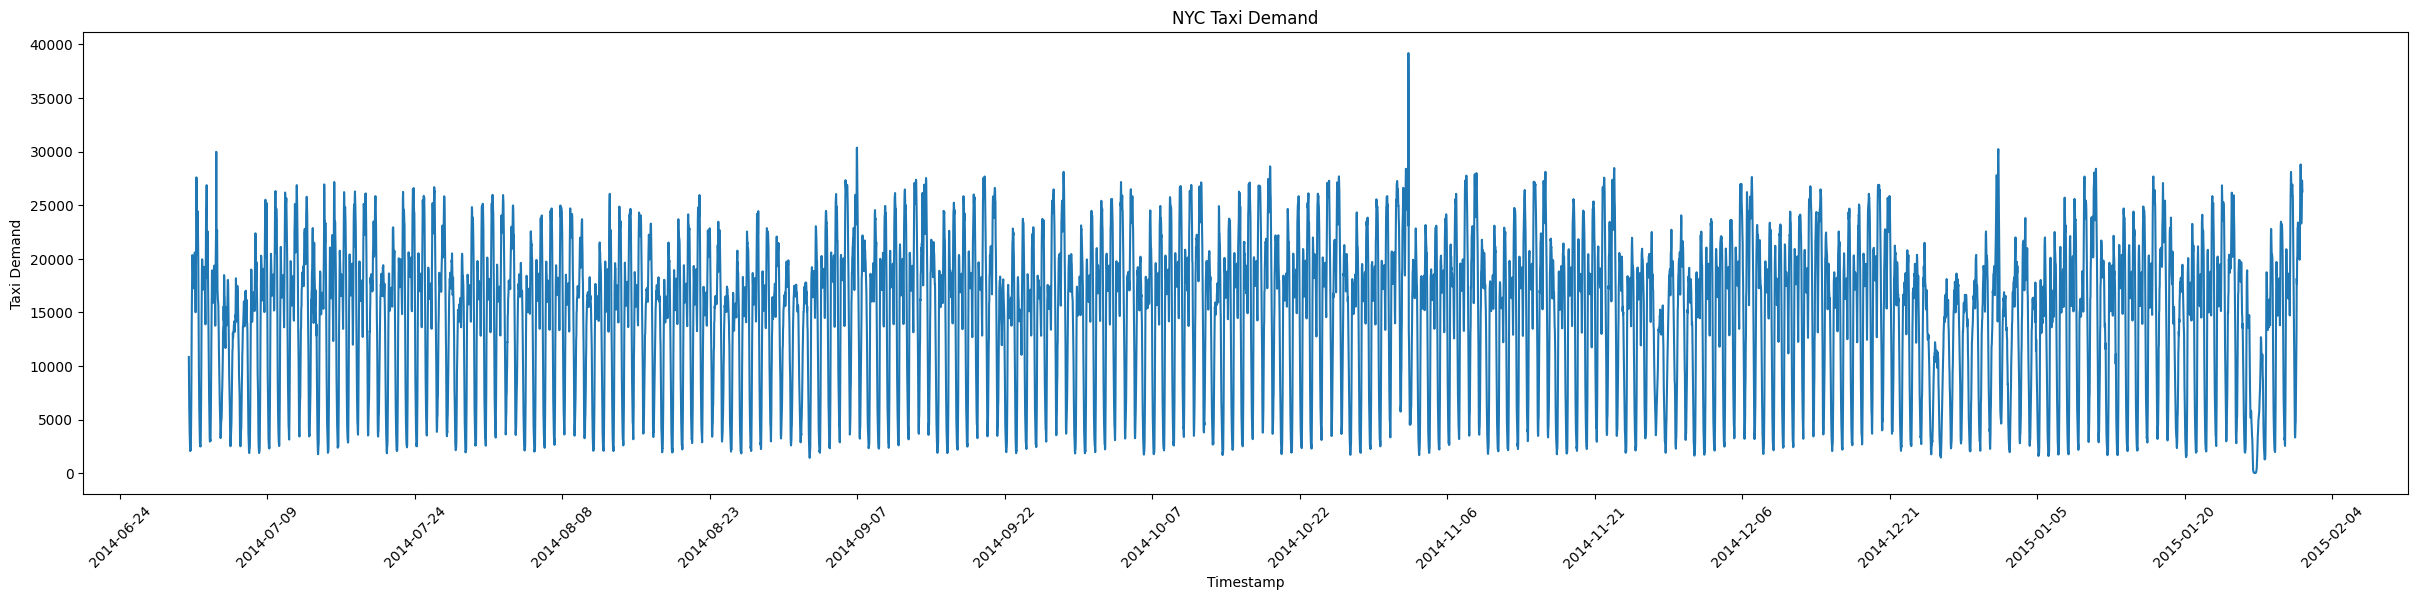

In [175]:
plt.figure(figsize=(30, 6))
dfr = df#[0:10000]
plt.plot(dfr['timestamp'], dfr['value'])
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Taxi Demand')
plt.title('NYC Taxi Demand')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
plt.show()

![alt text](image.png)

In [176]:
df = df.set_index('timestamp')
# Resampleo por hora
df = df.resample('H').mean().reset_index()

In [177]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5


In [178]:
df["hour"] = df.timestamp.dt.hour
df["weekday"] = df.timestamp.dt.weekday

<AxesSubplot:xlabel='weekday'>

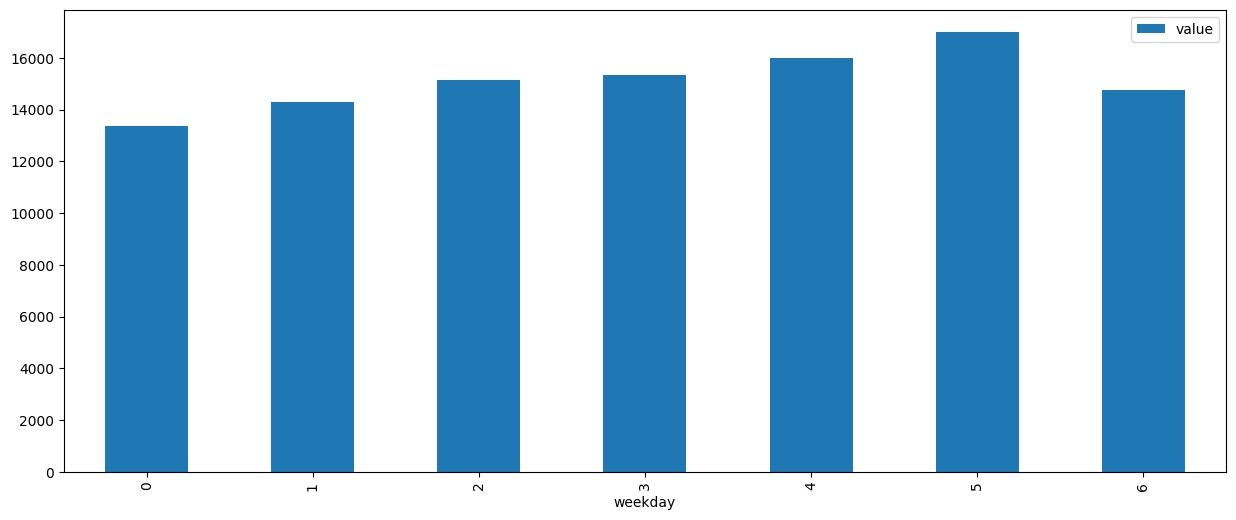

In [179]:
df[['value', 'weekday']].groupby('weekday').mean().plot(kind='bar', figsize=(15, 6))

<AxesSubplot:xlabel='hour'>

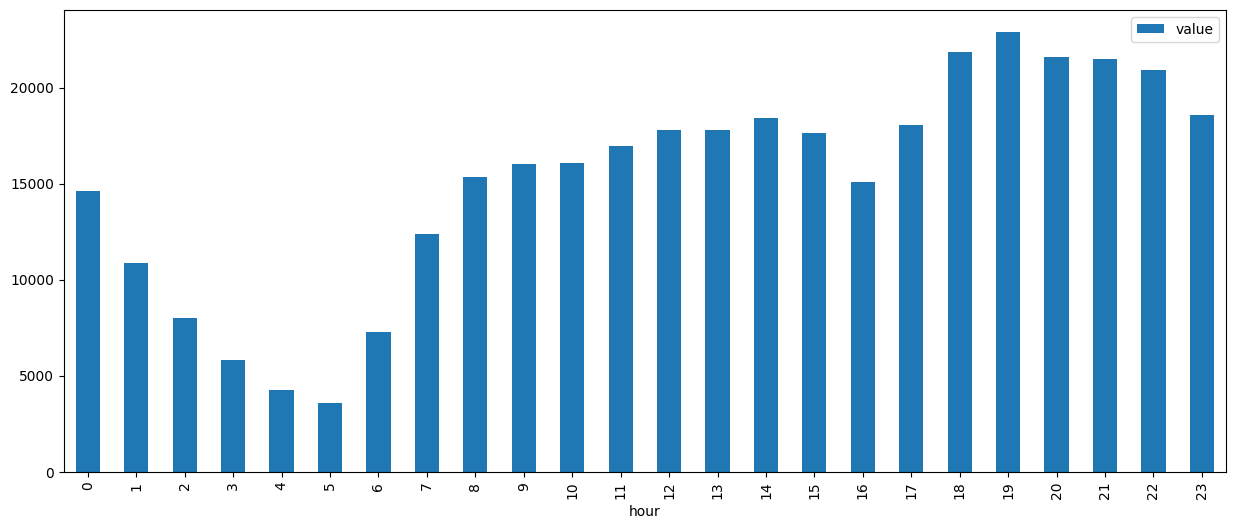

In [180]:
df[['value', 'hour']].groupby('hour').mean().plot(kind='bar', figsize=(15, 6))

NYC Marathon: 22/11/2014</BR>
Thanksgiving: 27/11/2014</BR>
Navidad: 25/12/2014</BR>
Año nuevo: 01/01/2015</BR>
Nevada: 26/01/2015 -> 27/01/2015</BR>

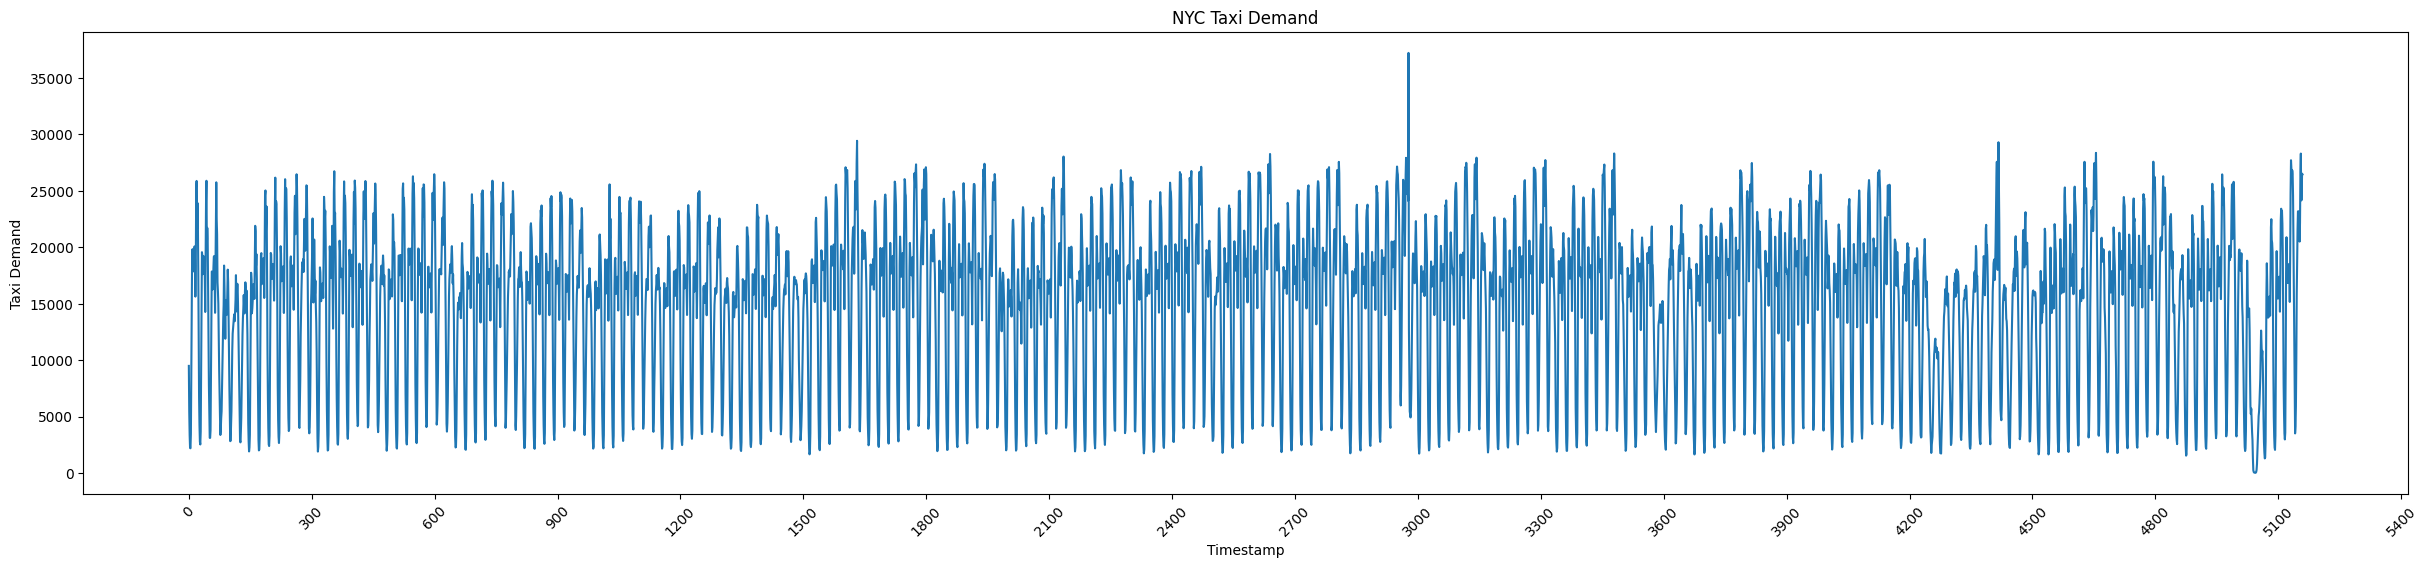

In [181]:
plt.figure(figsize=(30, 6))
dfr = df#[0:10000]
plt.plot(dfr.index , dfr['value'])
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.ylabel('Taxi Demand')
plt.title('NYC Taxi Demand')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=20))
plt.show()

In [182]:
from sklearn.ensemble import IsolationForest

Solo con valores

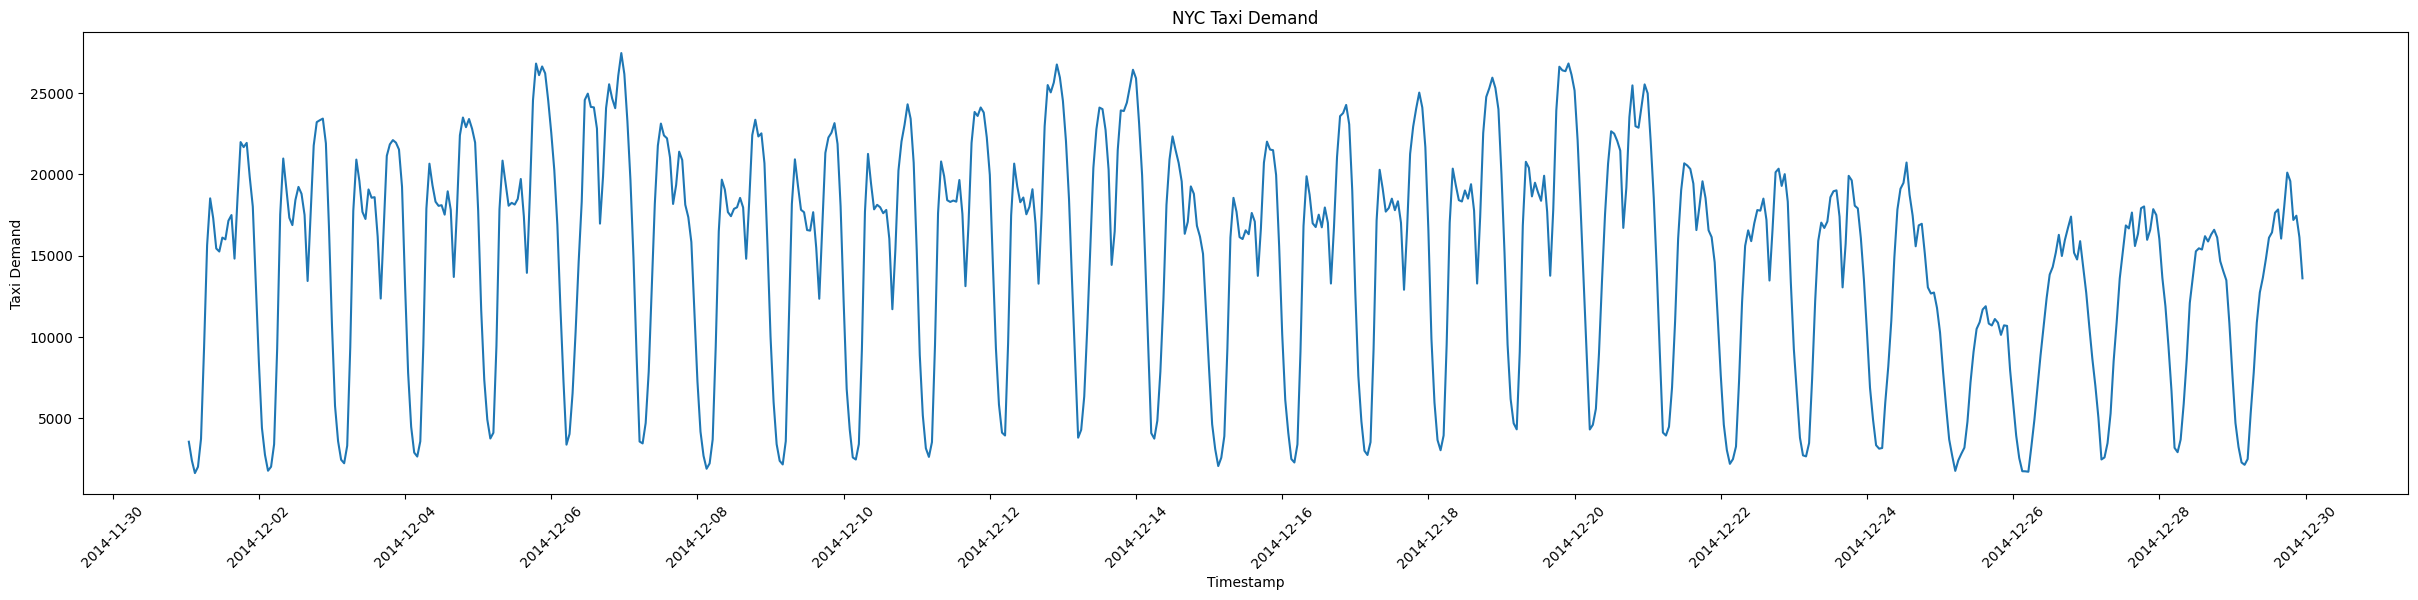

In [184]:


clf = IsolationForest(contamination=0.004, n_estimators=300)
clf.fit(df[['value']])
df["is_anomaly"] = clf.predict(df[['value']])
df["is_anomaly"] = df["is_anomaly"].map({1: 0, -1: 1})
nytAnomalyPlot(df[(df.timestamp>'2014-12-01') & ((df.timestamp<'2014-12-30'))])


In [185]:

clf = IsolationForest(contamination=0.004, n_estimators=300)
clf.fit(df[['value', 'hour', 'weekday']])
df["is_anomaly"] = clf.predict(df[['value', 'hour', 'weekday']])
df["is_anomaly"] = df["is_anomaly"].map({1: 0, -1: 1})

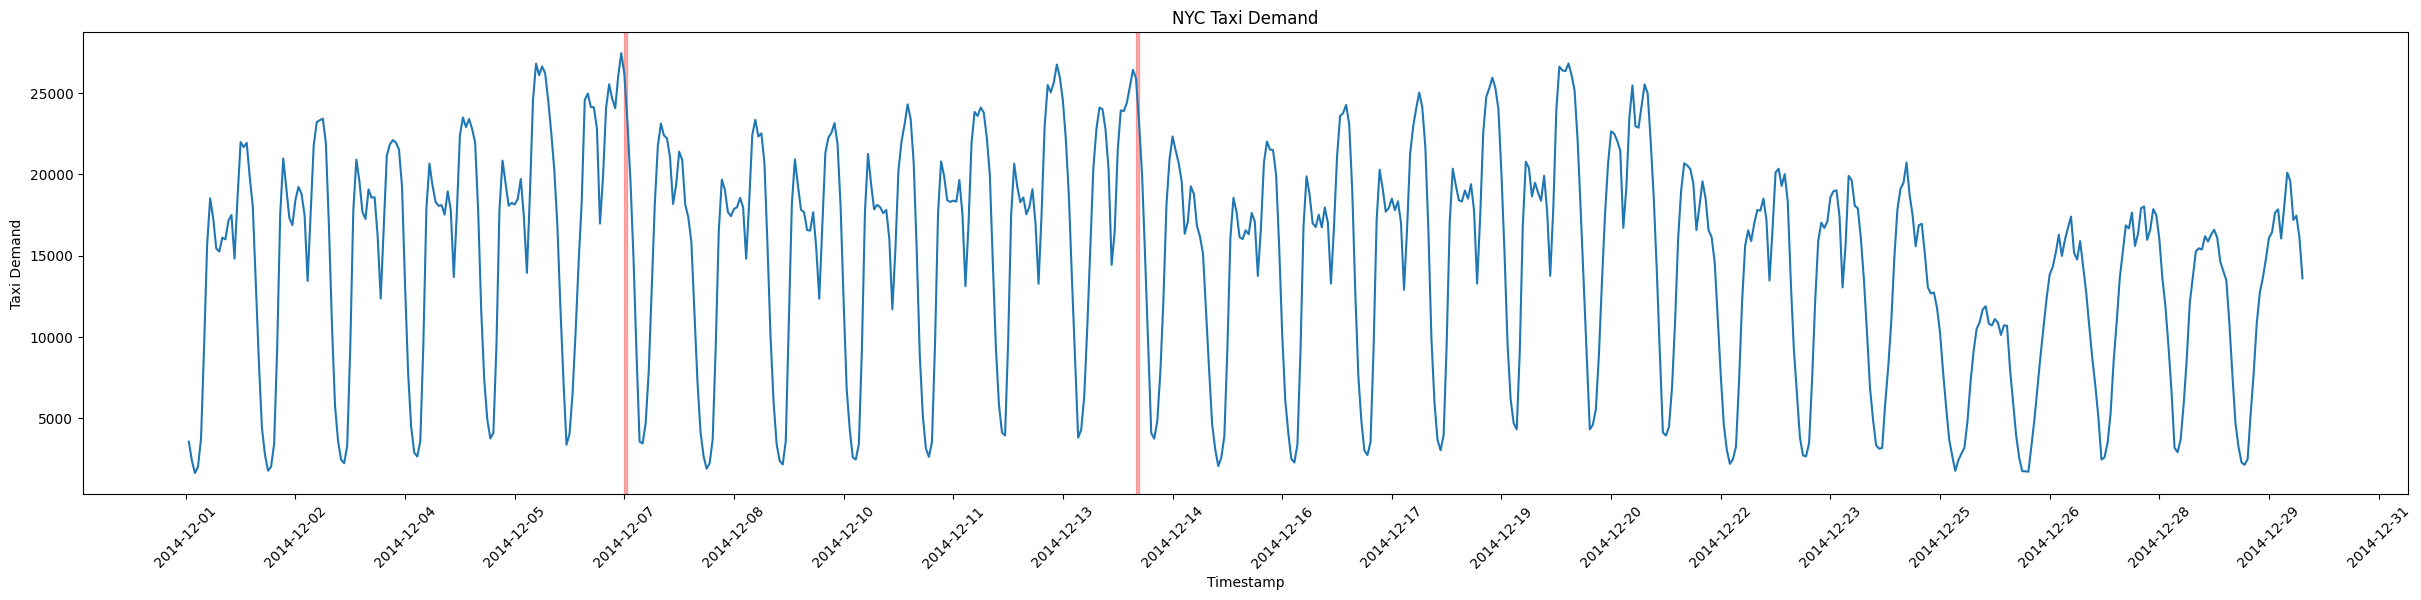

In [188]:
nytAnomalyPlot(df[(df.timestamp>'2014-12-01') & ((df.timestamp<'2014-12-30'))])